In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [39]:
df = pd.read_csv('../../datos/attacks_limpio_2.csv', index_col=0)

¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.

In [40]:
fatales_paises = pd.DataFrame(df.groupby('country')['case_number'].count())
fatales_paises.reset_index(inplace=True)
fatales_paises.sort_values(by = 'case_number', ascending=False, inplace=True)

<AxesSubplot:xlabel='country', ylabel='case_number'>

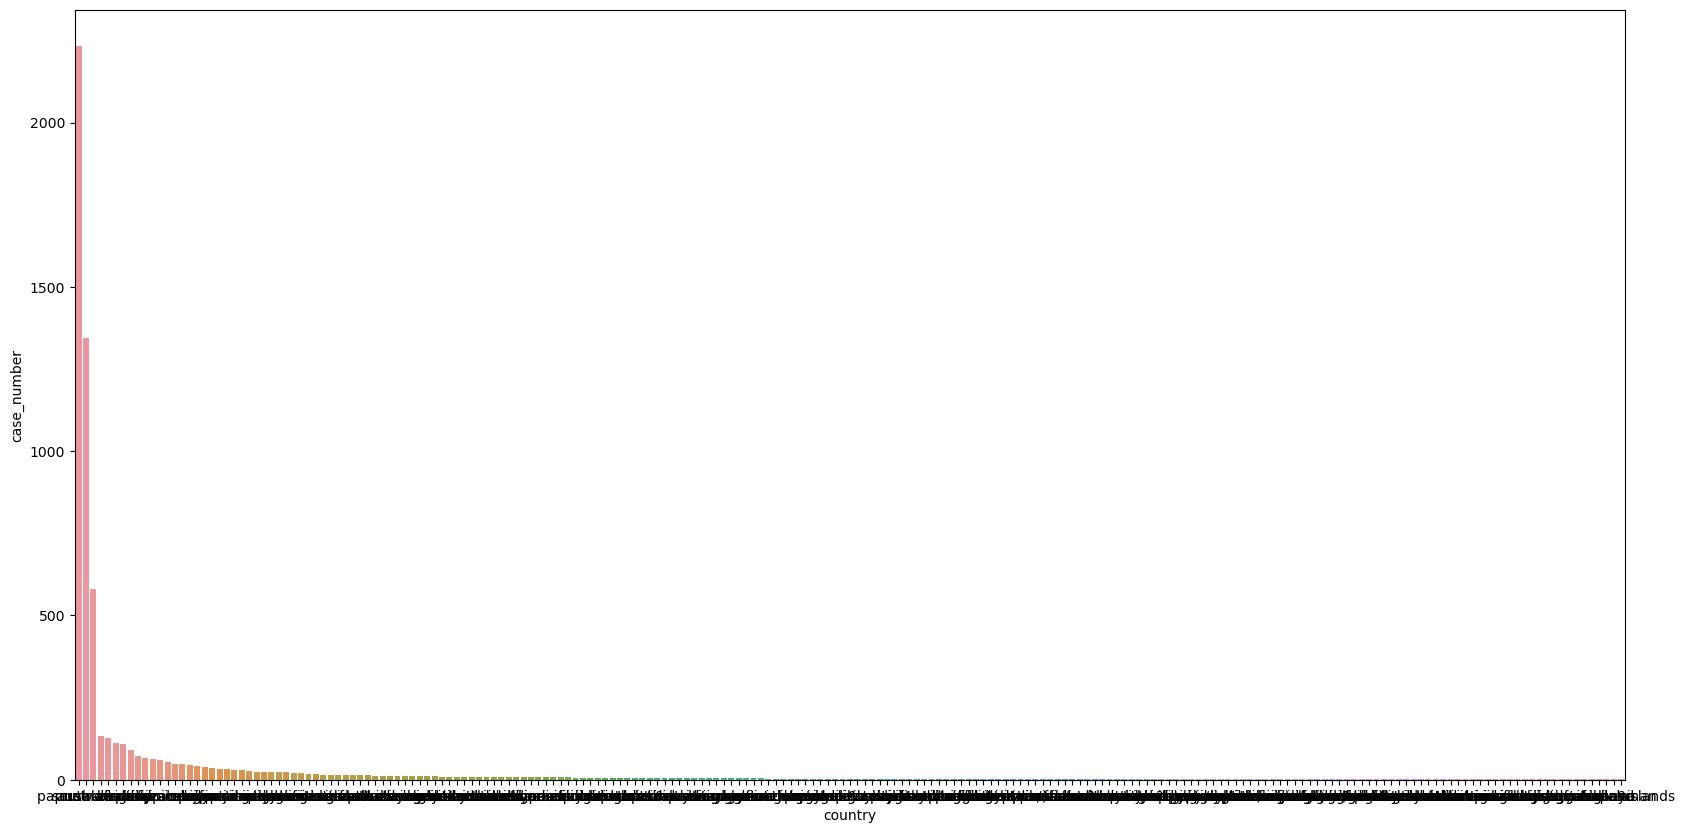

In [41]:
plt.figure(figsize=(20,10))

sns.barplot(data=fatales_paises, x='country', y='case_number')

In [42]:
fatales_paises[:11]

,country,case_number
201,usa,2232
14,australia,1343
170,south africa,579
144,papua new guinea,134
126,new zealand,127
24,brazil,112
16,bahamas,109
112,mexico,89
89,italy,72
61,fiji,65


Text(0, 0.5, 'Cantidad de ataques')

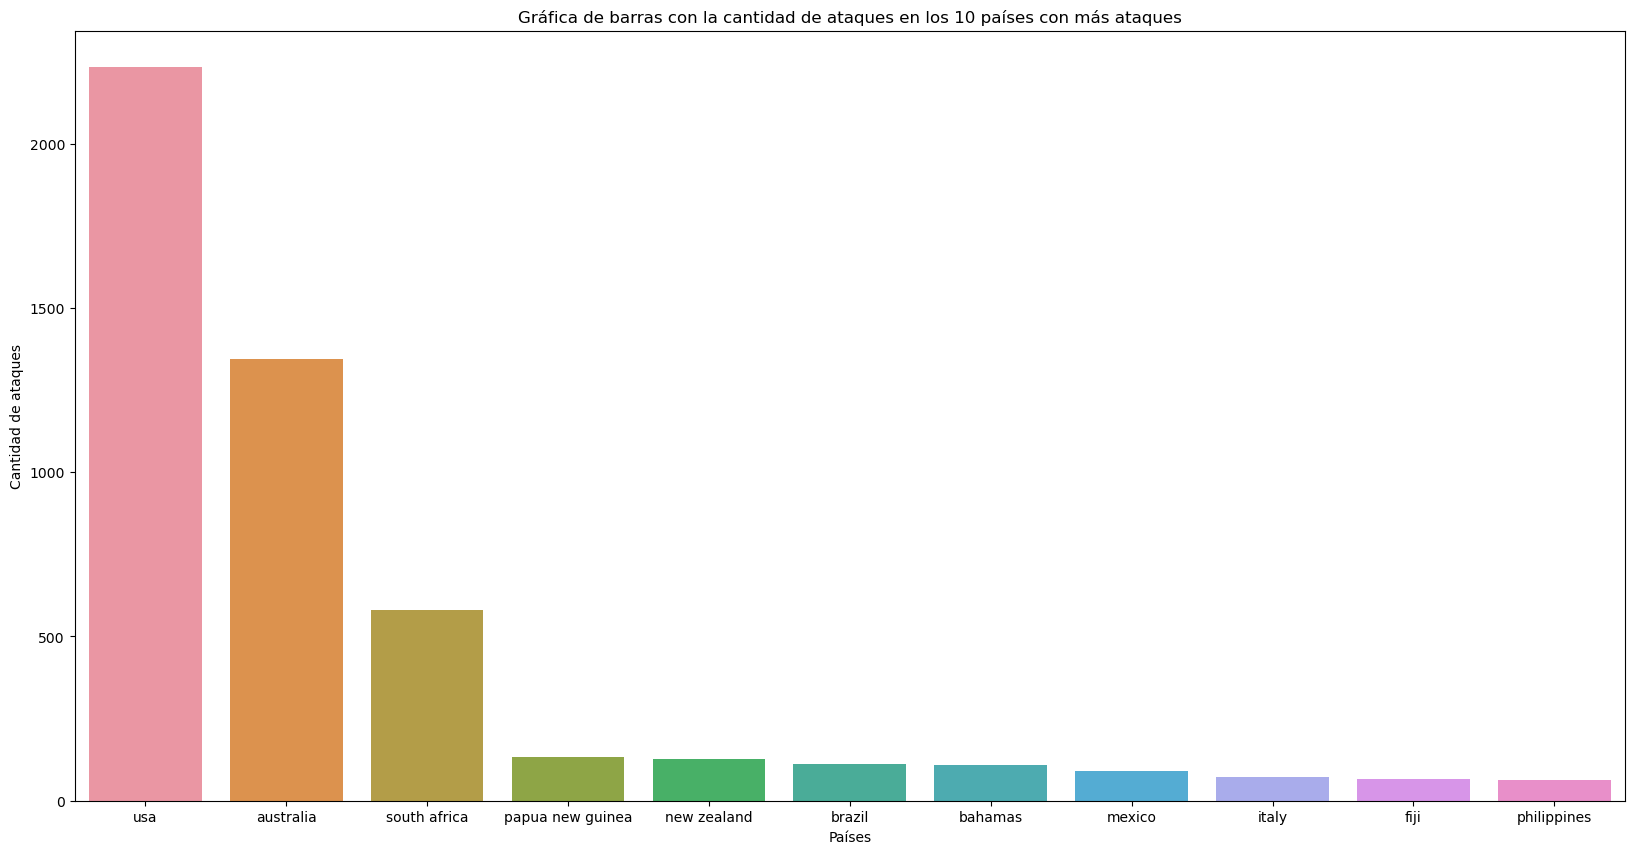

In [43]:
fig, ax = plt.subplots(figsize=(20,10))

sns.barplot(data=fatales_paises[:11], x='country', y='case_number')
plt.title('Gráfica de barras con la cantidad de ataques en los 10 países con más ataques')
ax.set_xlabel('Países')
ax.set_ylabel('Cantidad de ataques')

Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?

In [44]:
ataques_sex_pais = pd.DataFrame(df.groupby(['country', 'sex'])['case_number'].count())
ataques_sex_pais.reset_index(inplace=True)
ataques_sex_pais.sort_values(by = 'case_number', ascending=False, inplace=True)

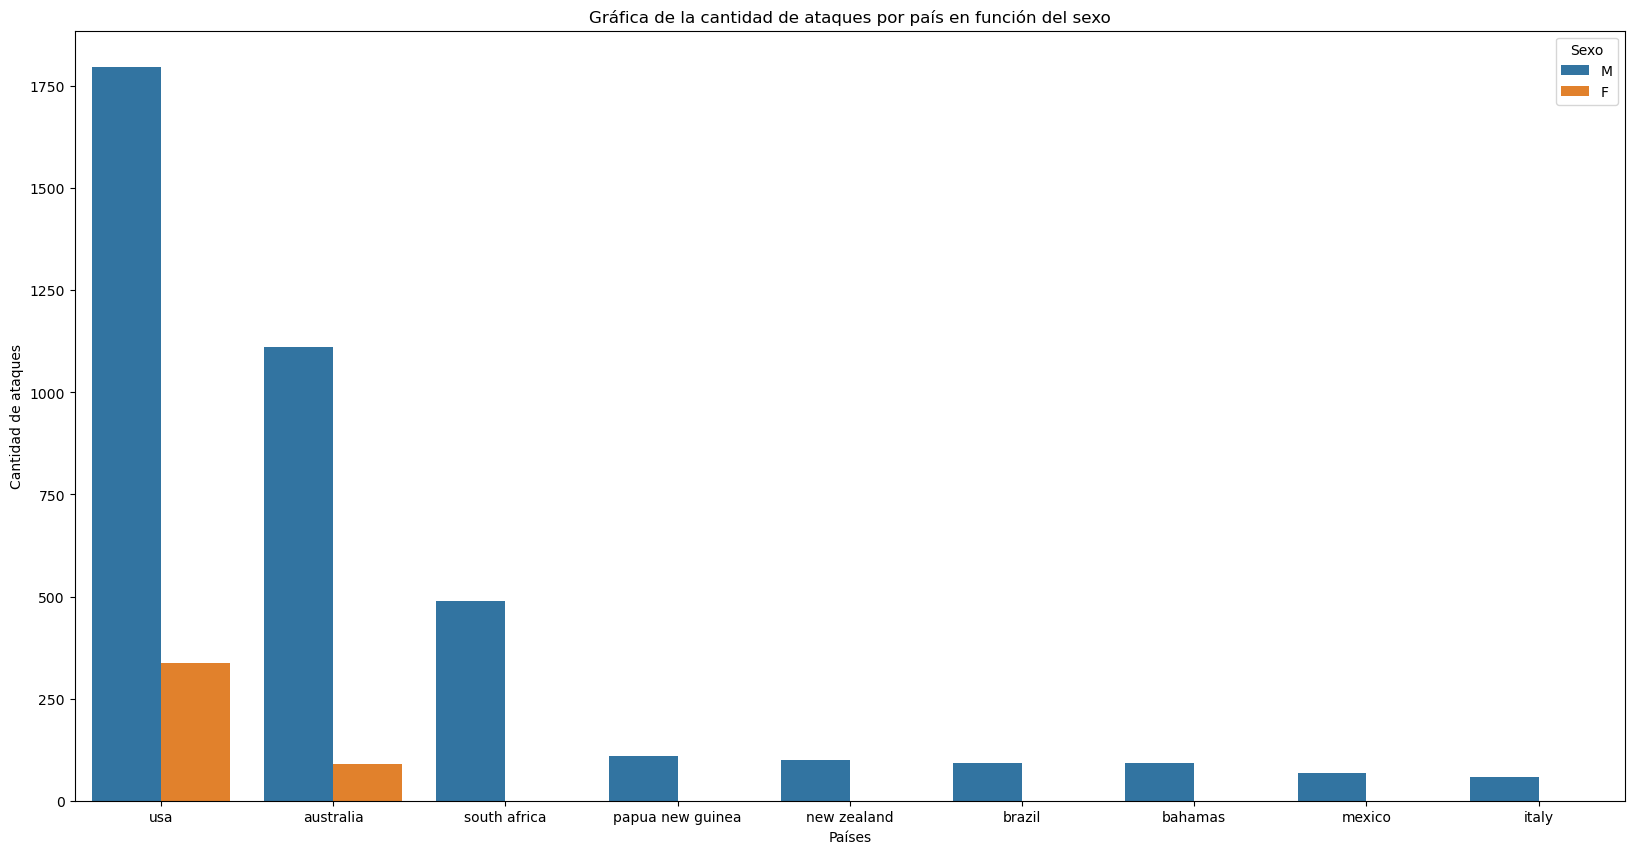

In [45]:
fig,ax=plt.subplots(figsize=(20,10))

sns.barplot(data=ataques_sex_pais[:11], x='country', y='case_number', hue='sex')

plt.title('Gráfica de la cantidad de ataques por país en función del sexo')
ax.set_xlabel('Países')
ax.set_ylabel('Cantidad de ataques')
ax.legend(title='Sexo')

¿Qué edad recibe mayor número de ataques? 💡 Pista 💡 Para que esta gráfica nos salga legible tendremos que crear antes grupos de edad. Para hacer esto de una forma sencilla tenemos el método pd.cut() que aprendimos en la lección de Limpieza II.

In [46]:
df_copia=df.copy()

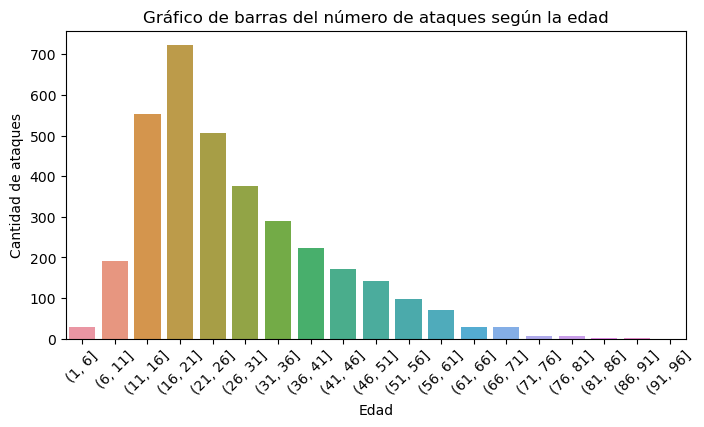

In [47]:
bins = np.arange(1, 100, 5)
df_copia["age_group"] = pd.cut(df_copia["age"], bins=bins)
plt.figure(figsize =(8,4))
fig = sns.countplot(x= 'age_group', data = df_copia)
fig.set(xlabel='Edad', ylabel= 'Cantidad de ataques')
fig.set_title('Gráfico de barras del número de ataques según la edad')
plt.xticks(rotation=45)
plt.show() 

Ataques entre sexos, ¿hay diferencia?

In [48]:
sexo = pd.DataFrame(df.groupby('sex')['case_number'].count())
sexo.reset_index(inplace=True)

sexo.rename(columns={'case_number': 'cantidad de casos'}, inplace=True)
sexo.sort_values(by='cantidad de casos', ascending=False)

,sex,cantidad de casos
1,M,5115
0,F,643


Text(0, 0.5, 'Cantidad de casos')

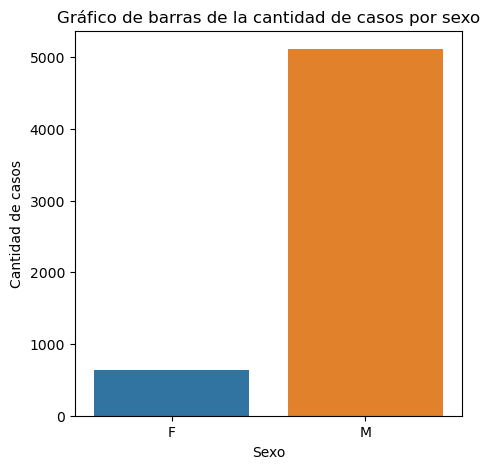

In [49]:
fig,ax=plt.subplots(figsize=(5,5))

sns.barplot(x=sexo['sex'], y=sexo['cantidad de casos'], data=sexo)
plt.title('Gráfico de barras de la cantidad de casos por sexo')
ax.set_xlabel('Sexo')
ax.set_ylabel('Cantidad de casos')

¿Cuando ocurren más ataques? ¿Os sale algo raro en la gráfica? Intentad limpiar un poco los datos para que os salga mejor.

<AxesSubplot:xlabel='mes', ylabel='count'>

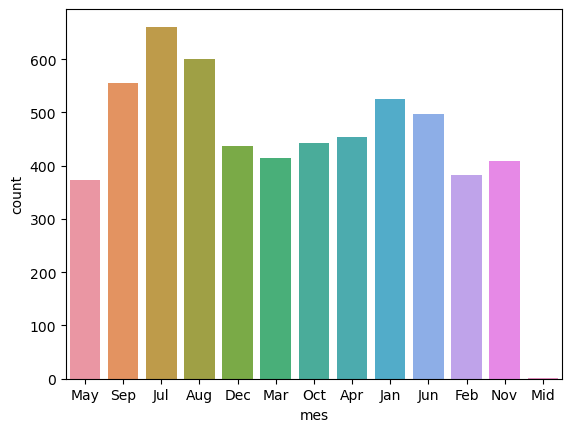

In [50]:
sns.countplot(data=df, x='mes')

In [51]:
df['mes'].unique() #hay que limpiar para que desaparezca la palabra Mid.

array([nan, 'May', 'Sep', 'Jul', 'Aug', 'Dec', 'Mar', 'Oct', 'Apr', 'Jan',
       'Jun', 'Feb', 'Nov', 'Mid'], dtype=object)

In [52]:
df['mes'] = df['mes'].replace('Mid', 'Unknown')

In [53]:
df['mes'].unique()

array([nan, 'May', 'Sep', 'Jul', 'Aug', 'Dec', 'Mar', 'Oct', 'Apr', 'Jan',
       'Jun', 'Feb', 'Nov', 'Unknown'], dtype=object)

In [54]:
meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Unknown']


Text(0, 0.5, 'Cantidad de ataques')

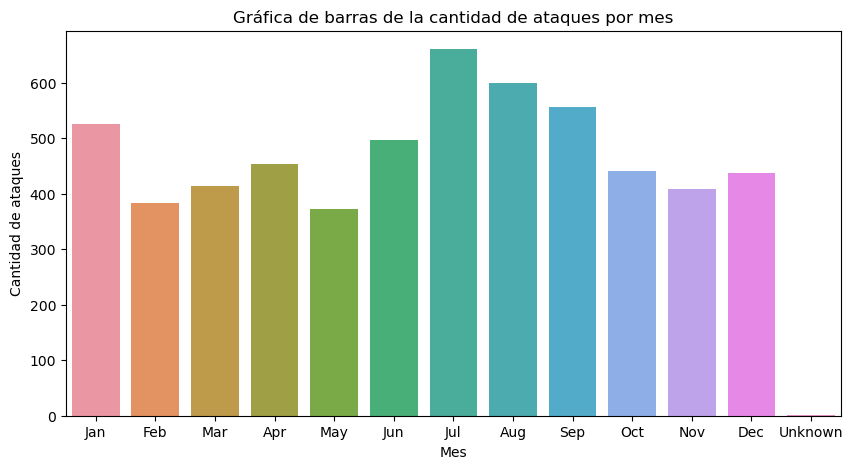

In [55]:
fig, ax = plt.subplots(figsize=(10,5))

sns.countplot(data=df, x='mes', order=meses)

plt.title('Gráfica de barras de la cantidad de ataques por mes')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad de ataques')

In [56]:
# Como hemos hecho cambios en nuestro dataframe, lo guardaremos en un nuevo archivo.

df.to_csv('../../datos/attacks_limpio_3.csv')